# Pytorch Quickstart

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

## Input Sample

In [1]:
import pandas as pd
import torch

data = {
    'feature1': [1.0, 2.0, 3.0, 4.0],
    'feature2': [5.0, 6.0, 7.0, 8.0],
    'feature3': [9.0, 10.0, 11.0, 12.0]
}

df = pd.DataFrame(data)
print("DataFrame:\n", df)

numpy_array = df.values
print("NumPy Array:\n", numpy_array)

tensor = torch.tensor(numpy_array, dtype=torch.float32)
print("PyTorch Tensor:\n", tensor)


DataFrame:
    feature1  feature2  feature3
0       1.0       5.0       9.0
1       2.0       6.0      10.0
2       3.0       7.0      11.0
3       4.0       8.0      12.0
NumPy Array:
 [[ 1.  5.  9.]
 [ 2.  6. 10.]
 [ 3.  7. 11.]
 [ 4.  8. 12.]]
PyTorch Tensor:
 tensor([[ 1.,  5.,  9.],
        [ 2.,  6., 10.],
        [ 3.,  7., 11.],
        [ 4.,  8., 12.]])


In [2]:
import torch

In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.7934, 0.4895, 0.0391],
        [0.3918, 0.1688, 0.2176],
        [0.2507, 0.8673, 0.1237],
        [0.5866, 0.4674, 0.9257],
        [0.7513, 0.8348, 0.1053]])


In [4]:
torch.cuda.is_available()

False

In [5]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [6]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="../../data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="../../data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [7]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [32]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

# Step 1: Create a sample DataFrame
data = pd.DataFrame({
    'feature1': [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0, 4.0],
    'feature2': [5.0, 6.0, 7.0, 8.0, 5.0, 6.0, 7.0, 8.0],
    'feature3': [9.0, 10.0, 11.0, 12.0, 9.0, 10.0, 11.0, 12.0],
    'feature4': [9.0, 10.0, 11.0, 12.0, 9.0, 10.0, 11.0, 12.0],
    'label': [0., 1., 0., 1., 0.2, 0.8, 0.1, 0.9]
})

test_data =pd.DataFrame({
    'feature1': [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0, 4.0],
    'feature2': [5.0, 6.0, 7.0, 8.0, 5.0, 6.0, 7.0, 8.0],
    'feature3': [9.0, 10.0, 11.0, 12.0, 9.0, 10.0, 11.0, 12.0],
    'feature4': [9.0, 10.0, 11.0, 12.0, 9.0, 10.0, 11.0, 12.0],
    'label': [0.1, .9, 0.2, .8, 0.2, 0.8, 0.1, 0.9]
})

# Step 2: Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.features = torch.tensor(dataframe.iloc[:, :-1].values, dtype=torch.float32)  # Assuming last column is the label
        self.labels = torch.tensor(dataframe.iloc[:, -1].values, dtype=torch.float32)  # Assuming labels are float

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Step 3: Create an instance of the dataset and DataLoader
batch_size = 4  # Define your batch size


# dataset = CustomDataset(data)
train_dataloader = DataLoader(CustomDataset(data), batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(CustomDataset(test_data), batch_size=batch_size, shuffle=True)

# Step 4: Iterate through the DataLoader and check the batches
for batch_features, batch_labels in train_dataloader:
    print("Batch features:\n", batch_features)
    print("Batch labels:\n", batch_labels)


Batch features:
 tensor([[ 2.,  6., 10., 10.],
        [ 1.,  5.,  9.,  9.],
        [ 3.,  7., 11., 11.],
        [ 4.,  8., 12., 12.]])
Batch labels:
 tensor([1.0000, 0.2000, 0.0000, 0.9000])
Batch features:
 tensor([[ 4.,  8., 12., 12.],
        [ 3.,  7., 11., 11.],
        [ 2.,  6., 10., 10.],
        [ 1.,  5.,  9.,  9.]])
Batch labels:
 tensor([1.0000, 0.1000, 0.8000, 0.0000])


## Create Models

In [110]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=8):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 1)
        self.output = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.output(self.fc3(x))
        return x

# class DistNeuralNetwork(nn.Module):
#     def __init__(self, input_size, hidden_size):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.mean = nn.Linear(hidden_size, 1)
#         self.log_var = nn.Linear(hidden_size, 1)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         return x

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (output): Sigmoid()
  (relu): ReLU()
)


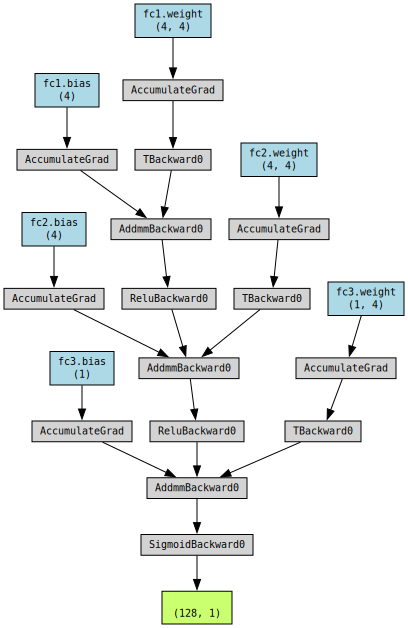

In [111]:
import torchviz 
import torch.nn.functional as F 

sample_input = torch.randn(128, 4)
model = NeuralNetwork(input_dim=4, hidden_dim=4).to(device)
recon_batch = model(sample_input)
torchviz.make_dot(recon_batch, params=dict(model.named_parameters()))

### Optimizing the Model Parameters

In [112]:
kl_loss = nn.KLDivLoss(reduction='batchmean')
mse_loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [113]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        outputs = model(X)
        # Apply LogSoftmax to the outputs
        # log_outputs = torch.log_softmax(outputs, dim=1)
        # Calculate loss
        # outputs = torch.log_softmax(outputs, dim=1)
        # y = torch.softmax(y, dim=1)

        loss = loss_fn(outputs, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 2 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [114]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            
            # pred = torch.log_softmax(pred, dim=1)
            # y = torch.softmax(y, dim=1)

            test_loss += loss_fn(pred, y).item()
            # correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            print(f'Predicted: "{pred}", Actual: "{y}", loss: "{test_loss}"')
    # test_loss /= num_batches
    # # correct /= size
    # print(f"Avg loss: {test_loss:>8f} \n")


In [115]:

def eval(dataloader, model):
    model.eval()
    with torch.no_grad():
        for batch_features, batch_targets in dataloader:
            pred = model(batch_features)
            pred.view(-1)
            # pred = torch.log(torch.abs(pred))
            # pred = torch.log(pred)
            # predicted, actual = classes[pred[0].argmax(0)], classes[y]
            print(f'Predicted: "{pred}", Actual: "{batch_targets}"')

In [116]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, mse_loss, optimizer)
    test(test_dataloader, model, mse_loss)
print("Done!")

Epoch 1
-------------------------------
loss: 0.187756  [    0/    8]
Predicted: "tensor([[0.5065],
        [0.5162],
        [0.4871],
        [0.4968]])", Actual: "tensor([0.8000, 0.2000, 0.9000, 0.1000])", loss: "0.125120609998703"
Predicted: "tensor([[0.5162],
        [0.5065],
        [0.4871],
        [0.4968]])", Actual: "tensor([0.1000, 0.9000, 0.8000, 0.2000])", loss: "0.250241219997406"
Epoch 2
-------------------------------
loss: 0.228013  [    0/    8]
Predicted: "tensor([[0.5273],
        [0.5201],
        [0.5129],
        [0.5129]])", Actual: "tensor([0.9000, 0.2000, 0.8000, 0.9000])", loss: "0.11804071068763733"
Predicted: "tensor([[0.5345],
        [0.5273],
        [0.5345],
        [0.5201]])", Actual: "tensor([0.2000, 0.8000, 0.1000, 0.1000])", loss: "0.25558269023895264"
Epoch 3
-------------------------------
loss: 0.186958  [    0/    8]
Predicted: "tensor([[0.5363],
        [0.5227],
        [0.5295],
        [0.5159]])", Actual: "tensor([0.2000, 0.2000, 0.9000

/opt/homebrew/anaconda3/envs/python-notebook/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [107]:
eval(test_dataloader, model)

Predicted: "tensor([[0.5086],
        [0.5086],
        [0.5086],
        [0.5086]])", Actual: "tensor([0.2000, 0.9000, 0.9000, 0.8000])"
Predicted: "tensor([[0.5086],
        [0.5086],
        [0.5086],
        [0.5086]])", Actual: "tensor([0.8000, 0.1000, 0.1000, 0.2000])"


### Model Save & Load

In [90]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [60]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

RuntimeError: Error(s) in loading state_dict for NeuralNetwork:
	size mismatch for fc1.weight: copying a param with shape torch.Size([4, 4]) from checkpoint, the shape in current model is torch.Size([8, 4]).
	size mismatch for fc1.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([8]).
	size mismatch for fc2.weight: copying a param with shape torch.Size([4, 4]) from checkpoint, the shape in current model is torch.Size([8, 8]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([8]).
	size mismatch for output.weight: copying a param with shape torch.Size([1, 4]) from checkpoint, the shape in current model is torch.Size([1, 8]).

In [61]:
# classes = [
#     "T-shirt/top",
#     "Trouser",
#     "Pullover",
#     "Dress",
#     "Coat",
#     "Sandal",
#     "Shirt",
#     "Sneaker",
#     "Bag",
#     "Ankle boot",
# ]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    for batch_features, batch_targets in val_dataloader:
        mean, log_var = model(batch_features)
        predictions = mean
    pred, actual = model(x), y
    print(f'pred: "{pred}"')
    # predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{pred}", Actual: "{actual}"')

KeyError: 0